# Lab 6: Non-parametric tests: Kolmogorov-Smirnov

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, kstest, expon, t, ksone

%matplotlib inline

In [303]:
def ks_statistic(F, f, support):
    '''Calculate the Kolmogorov-Smirnov statistic.
       Arguments:
           * F: theoretical CDF (vectorized)
           * f: values of the empirical CDF
           * support: support of the empirical CDF
    '''
    statistic = np.max(np.abs(f - F(support)))
    return statistic, 2 * ksone(len(support)).sf(statistic)

In [304]:
def calculate_empirical_CDF(X):
    support = np.sort(X)
    empirical_CDF = np.less_equal.outer(support, support).mean(axis=0)
    return support, empirical_CDF

In [305]:
values = pd.read_csv('dataset1.txt', header=None)[0]

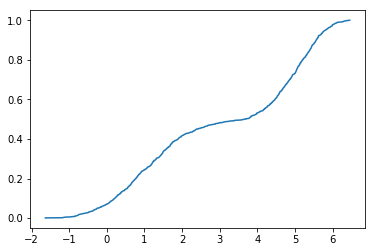

In [306]:
plt.plot(*calculate_empirical_CDF(values))

In [307]:
support, emp_CDF = calculate_empirical_CDF(values)

In [308]:
# Let's check if normal
ks_statistic(norm(values.mean(), values.std()).cdf, emp_CDF, support)

(0.15356280971972192, 0.0)

In [309]:
norm_sample = norm(0, 1).rvs(1000)
support, emp_CDF = calculate_empirical_CDF(norm_sample)
ks_statistic(norm(0, 1).cdf, emp_CDF, support)

(0.03340248527666434, 0.21000252165684374)

In [310]:
kstest(norm_sample, norm(0, 1).cdf)

KstestResult(statistic=0.034402485276664341, pvalue=0.18324115924879103)

In [311]:
t_sample = t(3).rvs(1000)
support, emp_CDF = calculate_empirical_CDF(t_sample)
ks_statistic(t(3).cdf, emp_CDF, support)

(0.034881462160343824, 0.1714157620271386)

In [312]:
kstest(t_sample, t(3).cdf)

KstestResult(statistic=0.034881462160343824, pvalue=0.1714157620271386)